<a href="https://colab.research.google.com/github/Jolobov/AI_Systems/blob/main/LaboratoryWork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Подзагрузка файлов.

В ходе выполнения контрольной работы был использован датасет student_alcohol_data:
https://www.kaggle.com/datasets/mahmoudshogaa/student-alcholoh-data

# 2. Чтение файла.

Посмотрим содержимое в папке /content/:


In [1]:
# импортируем модуль 'os'
import os

# выведем пути к каталогам (dirpath) и имена файлов (filenames)
for dirpath, _, filenames in os.walk('/content/'):

  # проходим по именам файлов
  for filename in filenames:

    # объединяем пути к папкам и вложенным в них файлам
    print(os.path.join(dirpath, filename))

/content/student.csv
/content/result.csv
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2023.12.14/14.24.33.618869.log
/content/.config/logs/2023.12.14/14.23.34.713490.log
/content/.config/logs/2023.12.14/14.24.22.589063.log
/content/.config/logs/2023.12.14/14.24.13.486496.log
/content/.config/logs/2023.12.14/14.24.32.746549.log
/content/.config/logs/2023.12.14/14.24.03.311767.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


Код успешно просматривает все файлы в каталоге "/content/" и его подкаталогах, выводя полные пути к каждому из них. Один из файлов в этом каталоге - "/content/student.csv", представляет собой загруженный файл данных о потреблении алкоголя студентами.

Рассмотрим различные способы предоставления информации о файлах.



In [2]:
# перечислим только видимые файлы и папки
!ls

result.csv  sample_data  student.csv


In [3]:
# перечислим файлы из папки 'sample_data'
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [4]:
# откроем файл
file = open('/content/student.csv', 'r')

# выведем первые 50 символов
print(file.read(50))

# закроем файл
file.close()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,M


In [5]:
# откроем файл
file = open('/content/student.csv', 'r')

# создадим итератор строк
for i, line in enumerate(file):

  # выведем строку файла
  print(line.strip())

  # прервем цикл если достигнута 4 строка
  if i == 3:
    break

# закроем файл
file.close()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [6]:
# импортируем модуль 'pandas'
import pandas as pd

# посмотрим первые три записи файла
file = pd.read_csv('/content/student.csv')
file.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


# 3. Построение модели и прогноз.

Создадим небольшую модель, способную прогнозировать уровень оценки и предоставлять всесторонний анализ потребления алкоголя студентами.

**Шаг 1. Обработка и анализ данных.**

**Исследовательский анализ данных (EDA).**
Выявим взаимосвязь между признаками и целевой переменной.

In [7]:
# воспользуемся методом '.info()' для обобщенного обзора наших данных.
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Dataset содержит 395 записей и 33 столбца.

0. school - школа (бинарное: 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira)
1. sex - пол студента (бинарное: 'F' - женский или 'M' - мужской)
2. age - возраст студента (числовой: от 15 до 22 лет)
3. address - тип домашнего адреса студента (бинарное: 'U' - городской или 'R' - сельский)
4. famsize - размер семьи (бинарное: 'LE3' - меньше или равно 3 или 'GT3' - больше 3)
5. Pstatus - статус сожительства родителей (бинарное: 'T' - живут вместе или 'A' - раздельно)
6. Medu - образование матери (числовое: 0 - отсутствует, 1 - начальное образование (4-й класс), 2 - с 5-го по 9-й класс, 3 - среднее образование или 4 - высшее образование)
7. Fedu - образование отца (числовое: 0 - отсутствует, 1 - начальное образование (4-й класс), 2 - с 5-го по 9-й класс, 3 - среднее образование или 4 - высшее образование)
8. Mjob - работа матери (номинальное: 'учитель', связано с 'здравоохранением', гражданская 'служба' (например, административная или полиция), 'дома' или 'другое')
9. Fjob - работа отца (номинальное: 'учитель', связано с 'здравоохранением', гражданская 'служба' (например, административная или полиция), 'дома' или 'другое')
10. reason - причина выбора этой школы (номинальное: близость к 'дому', 'репутация' школы, предпочтение 'курса' или 'другое')
11. guardian - опекун студента (номинальное: 'мать', 'отец' или 'другое')
12. traveltime - время в пути от дома до школы (числовое: 1 - менее 15 мин., 2 - 15-30 мин., 3 - 30 мин. до 1 часа или 4 - более 1 часа)
13. studytime - недельное время на учебу (числовое: 1 - менее 2 часов, 2 - 2-5 часов, 3 - 5-10 часов или 4 - более 10 часов)
14. failures - количество неудач в прошлых классах (числовое: n, если 1 <= n < 3, иначе 4)
15. schoolsup - дополнительная образовательная поддержка (бинарное: да или нет)
16. famsup - семейная образовательная поддержка (бинарное: да или нет)
17. paid - дополнительные платные занятия по предмету (математика или португальский) (бинарное: да или нет)
18. activities - внеклассные мероприятия (бинарное: да или нет)
19. nursery - посещал ли детский сад (бинарное: да или нет)
20. higher - хочет получить высшее образование (бинарное: да или нет)
21. internet - наличие интернета дома (бинарное: да или нет)
22. romantic - наличие романтических отношений (бинарное: да или нет)
23. famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
24. freetime - свободное время после школы (числовое: от 1 - очень мало до 5 - очень много)
25. goout - время, проведенное с друзьями (числовое: от 1 - очень мало до 5 - очень много)
26. Dalc - потребление алкоголя в будний день (числовое: от 1 - очень мало до 5 - очень много)
27. Walc - потребление алкоголя в выходные (числовое: от 1 - очень мало до 5 - очень много)
28. health - текущее состояние здоровья (числовое: от 1 - очень плохо до 5 - очень хорошо)
29. absences - количество пропущенных занятий в школе (числовое: от 0 до 93)
30. G1 - оценка за первый период (числовое: от 0 до 20)
31. G2 - оценка за второй период (числовое: от 0 до 20)
32. G3 - итоговая оценка (числовое: от 0 до 20, целевой показатель)


Проведем визуальный анализ данных.

<Axes: xlabel='Dalc', ylabel='count'>

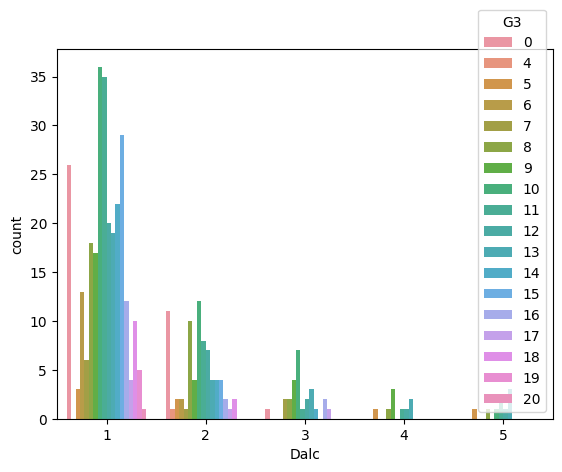

In [8]:
# импортируем модуль 'seaborn'
import seaborn as sns

# посмотрим насколько значимо потребление алкоголя в будний день для итоговой оценки
sns.countplot(x = 'Dalc', hue = 'G3', data = file)

Из результатов выполнения кода видно, что студенты, употребляющие алкоголь в небольших количествах в будние дни, получают более высокие оценки по сравнению с остальными.

<Axes: xlabel='Walc', ylabel='count'>

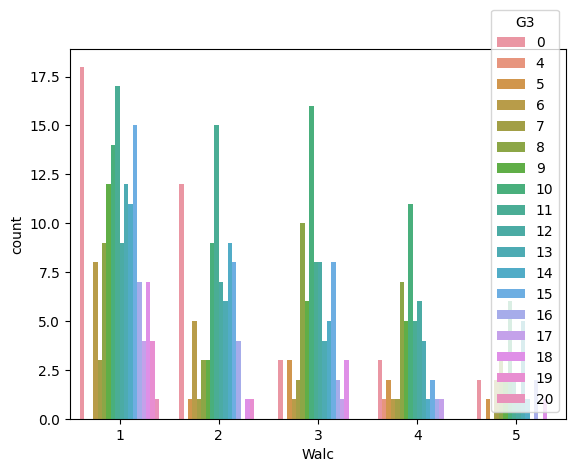

In [9]:
# посмотрим насколько значимо потребление алкоголя в выходные для итоговой оценки
sns.countplot(x = 'Walc', hue = 'G3', data = file)

При этом замечено, что влияние употребления алкоголя в выходные дни минимально для всех студентов.

**Пропущенные значения.**

In [10]:
# выявим пропущенные значения и посчитаем их количество
file.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

В результате выполнения кода не обнаружено пропущенных значений.

**Категориальные переменные.**


In [11]:
# создадим столбец с индеком студента
file.insert(0, 'ID', file.index + 1)

# преобразуем категориальные переменные в индикаторные переменные, применяя кодировку one-hot
id = pd.get_dummies(file[['ID']])
school = pd.get_dummies(file[['school']])
sex = pd.get_dummies(file[['sex']])
address = pd.get_dummies(file[['address']])
famsize = pd.get_dummies(file[['famsize']])
Pstatus = pd.get_dummies(file[['Pstatus']])
reason = pd.get_dummies(file[['reason']])
traveltime = pd.get_dummies(file[['traveltime']])
studytime = pd.get_dummies(file[['studytime']])
schoolsup = pd.get_dummies(file[['schoolsup']], drop_first=True)
famsup = pd.get_dummies(file[['famsup']], drop_first=True)
paid = pd.get_dummies(file[['paid']], drop_first=True)
activities = pd.get_dummies(file[['activities']], drop_first=True)
nursery = pd.get_dummies(file[['nursery']], drop_first=True)
higher = pd.get_dummies(file[['higher']], drop_first=True)
internet = pd.get_dummies(file[['internet']], drop_first=True)
romantic = pd.get_dummies(file[['romantic']], drop_first=True)
famrel = file[['famrel']]
freetime = file[['freetime']]
goout = file[['goout']]
Dalc = file[['Dalc']]
Walc = file[['Walc']]
health = file[['health']]
G1 = file[['G1']]
G2 = file[['G2']]
G3 = file[['G3']]

# удалим исходные переменные до применения кодировки one-hot
file.drop(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
           'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
           'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'], axis = 1, inplace = True)

# присоединим переменные к исходному датафрейму 'file'
file = pd.concat([file, id, school, sex, famsize, Pstatus, reason, traveltime, studytime, paid, activities,
                  nursery, higher, internet, romantic, famrel, goout, Dalc, Walc, health, G1, G2, G3], axis = 1)

# переименуем новые переменные
file.rename(columns={'schoolsup_yes': 'schoolsup'}, inplace=True)
file.rename(columns={'famsup_yes': 'famsup'}, inplace=True)
file.rename(columns={'paid_yes': 'paid'}, inplace=True)
file.rename(columns={'activities_yes': 'activities'}, inplace=True)
file.rename(columns={'nursery_yes': 'nursery'}, inplace=True)
file.rename(columns={'higher_yes': 'higher'}, inplace=True)
file.rename(columns={'internet_yes': 'internet'}, inplace=True)
file.rename(columns={'romantic_yes': 'romantic'}, inplace=True)

# выведем первые три строки таблицы
file.head(3)

,ID,school_GP,school_MS,sex_F,sex_M,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,reason_course,...,internet,romantic,famrel,goout,Dalc,Walc,health,G1,G2,G3
0,1,1,0,1,0,1,0,1,0,1,...,0,0,4,4,1,1,3,5,6,6
1,2,1,0,1,0,1,0,0,1,1,...,1,0,5,3,1,1,3,5,5,6
2,3,1,0,1,0,0,1,0,1,0,...,1,0,4,2,2,3,3,7,8,10


**Нормализация данных.**

In [12]:
# импортируем класс 'StandardScaler'
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# масштабируем и рассчитаем среднее арифмитическое и СКО
file[['reason_course', 'reason_home', 'reason_other', 'reason_reputation']] = \
scaler.fit_transform(file[['reason_course', 'reason_home', 'reason_other', 'reason_reputation']])

# посмотрим результат
print(file[['reason_course', 'reason_home', 'reason_other', 'reason_reputation']])

     reason_course  reason_home  reason_other  reason_reputation
0         1.313064    -0.617348     -0.316668          -0.601722
1         1.313064    -0.617348     -0.316668          -0.601722
2        -0.761577    -0.617348      3.157883          -0.601722
3        -0.761577     1.619831     -0.316668          -0.601722
4        -0.761577     1.619831     -0.316668          -0.601722
..             ...          ...           ...                ...
390       1.313064    -0.617348     -0.316668          -0.601722
391       1.313064    -0.617348     -0.316668          -0.601722
392       1.313064    -0.617348     -0.316668          -0.601722
393       1.313064    -0.617348     -0.316668          -0.601722
394       1.313064    -0.617348     -0.316668          -0.601722

[395 rows x 4 columns]


**Шаг 2. Разделение обучающей выборки на признаки и целевую.**

In [13]:
# импортируем модуль 'train_test_split'
from sklearn.model_selection import train_test_split

# разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(file.drop(columns=['Dalc']), file['Dalc'], train_size=0.8)

**Шаг 3. Обучение модели логической регрессии**

In [14]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=100000)

# обучим модель
model.fit(X_train, y_train)

# сделаем предсказание класса
y_pred_file = model.predict(X_train)

In [15]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1,2,3,4
0,196,18,2,0,0
1,35,30,0,1,0
2,4,10,3,0,1
3,3,1,1,3,0
4,0,1,0,0,7


In [16]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.756

На обучающей выборке модель показала результат в 75,6%.

**Шаг 4. Построение прогноза на тестовых данных**

In [17]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=10000)

# обучим модель
model.fit(X_test, y_test)

# сделаем предсказание класса
y_pred_file = model.predict(X_test)

In [18]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_test, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1,2,3,4
0,59,1,0,0,0
1,4,4,1,0,0
2,2,0,6,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [19]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_test, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.899

На тестовой выборке модель показала результат в 89,9%.

# 4. Сохранение результата в новом файле на сервере

In [20]:
# передадим индекс студентов
ids = X_test['ID']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - id студента,
# вторая - прогноз
result_file = pd.DataFrame({'Id' : ids, 'Dalc' : y_pred_file})

# посмотрим результат
result_file.head()

,Id,Dalc
313,314,1
363,364,1
151,152,3
143,144,1
38,39,1


In [21]:
# создадим новый файл result.csv, удалив индекс
result_file.to_csv('result.csv', index = False)

print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!
